In [362]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import math

## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30})
plt.rcParams.update({'font.size': 20})

Let's begin by putting all the constants that are given

In [363]:
m=40*1.66*1e-27
kb=1.38*1e-23
T=3
mu = 30*kb*T
A=3.5e+31
n=1
print("coucou Dim")
print("Coucou les gars")

Then, simply define the fermi function

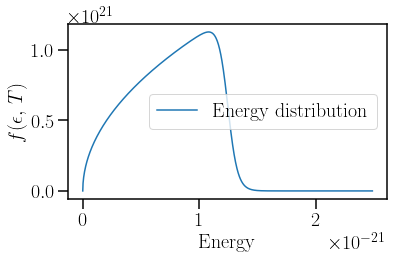

In [364]:
def f(epsilon, Temp):
    beta    = 1/(kb*Temp)
    numer   = A*np.sqrt(epsilon)
    denom   = np.exp(beta*(epsilon-mu)) + 1
    return numer/denom 

xfunc = np.linspace(0,2*mu,1000)
yfunc = f(x,3)
plt.plot(xfunc,yfunc, label = "Energy distribution")
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.tight_layout()
plt.legend()



For the first point, it is easier to show analitically that $f$ follows the Kolmogorov points ($f>0\forall x $, $\int_{\mathbb{R}} f = 1$)

For the second point, let's do a Monte Carlo code with a flat distribution. In principle, the energy goes from $0$ to $\infty$ but as we can see on figure above, after $\epsilon \approx 2\cdot\mu$, the function is roughly zero

In [365]:
def Egenerator(nEvents, Temp):
    listE =[]
    while len(listE)<nEvents :
        interval= (0, 2*mu)
        fmax    = np.max(f(np.linspace(0,3*mu,1000),3))*1.05
        gen     = np.random.default_rng()
        x       =gen.uniform(*interval)
        y       = gen.uniform(0, fmax)
        if y < f(x, Temp):
            listE.append(x)
    return listE        

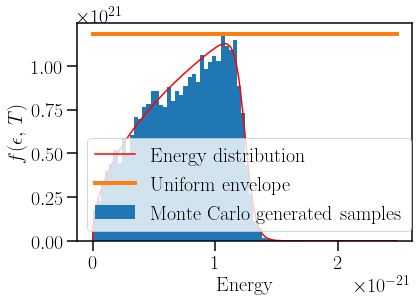

In [368]:
N       = 10000
nBins   = 50 
fmax    = np.max(f(np.linspace(0,3*mu,1000),3))*1.05

plt.plot(xfunc,yfunc, color = "r", label = "Energy distribution")
content,bin_edges, _ = plt.hist(Egenerator(N, 3), density=True, bins =nBins, label = "Monte Carlo generated samples")
plt.plot([0,2*mu],[fmax,fmax], label="Uniform envelope", lw=4)
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
#plt.tight_layout()
plt.legend()

To compute the mean, we compute numerically by doing 
$$
E(x) = \int xf(x) dx \approx \sum x f(x) \cdot \Delta x
$$
Where $f(x)$ = content, and $\Delta x$ is the bin width

The mean is :  7.459828217675146e-22  The theoretial mean is :  7.451999999999999e-22  The mean computed with numpy is :  7.431031856605087e-22


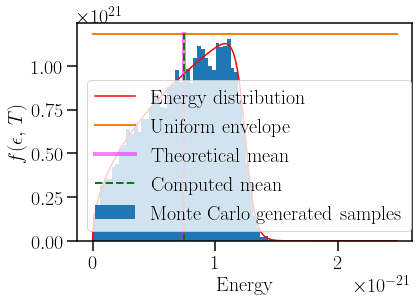

In [373]:
binWidth = (bin_edges[1] - bin_edges[0]) #/ nBins 
xCoords = bin_edges - binWidth/2

mean = np.sum(content*xCoords[1:]) *binWidth
meanTH = (3/5)*n*mu

plt.plot(xfunc,yfunc, color = "r", label = "Energy distribution")
plt.hist(Egenerator(N, 3), density=True, bins =nBins, label = "Monte Carlo generated samples")
plt.plot([0,2*mu],[fmax,fmax], label="Uniform envelope", lw=2)

plt.plot([meanTH, meanTH], [0, fmax], color = "magenta",alpha = 0.5, lw = 4, label = "Theoretical mean")
plt.plot([mean, mean], [0, fmax], '--', color = "green", lw = 2, label = "Computed mean")
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.legend()

m = np.mean(Egenerator(N,3))
print("The mean is : " ,mean, " The theoretial mean is : " , meanTH, " The mean computed with numpy is : ", m)


We see that the analysis is coherent and we could have used the function np.mean before ... --'


In [374]:
print(m/(kb*T))

17.94935231064031


We have : 
$$
\mathbb{E} = \dfrac{3}{5}n\mu = \dfrac{3}{5}n \cdot 30\,k_BT = 18 k_BT
$$
, Which is coherent with the result

In [375]:
v=np.var(Egenerator(N,3))
s=stat.skew(Egenerator(N,3))
k=stat.kurtosis(Egenerator(N,3))

print("variance = ", v , " skewness = ", s , " kurtosis = ", k)

variance =  1.1069772092804587e-43  skewness =  -0.28701229125540045  kurtosis =  -0.9249269032853644


In [376]:
stdev = np.sqrt(v)
stdev

3.3271267022469383e-22

Ex 2: 

Now we take the data points we managed to get. They are all distributed according to $f$, with a mean of $18\cdot k_BT$ and a variance $var \approx 1.07 \cdot 10^{-43}$

If we want to show the laws of large numbers, we can show that if we progressively compute the mean for a given number of samples ($N_{exp}=1), then the average will converge to a number, which should be the mean.

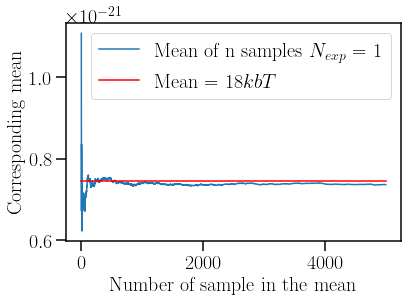

In [377]:
N=5000
data = Egenerator(N,3)
l = len(data)

listMean = []
for i in range(l):
    moy = np.mean(data[:i+1])
    listMean.append(moy)
xMean = np.linspace(0,N,N)

plt.plot(xMean, listMean, label = "Mean of n samples $N_{exp}$ = 1")
plt.plot([0,N],[18*kb*T,18*kb*T], color = "red", label = "Mean = $18 kb T$")
plt.xlabel("Number of sample in the mean")
plt.ylabel("Corresponding mean")
plt.legend()

It looks nice ! (Not sure that is what we had to show)

Now, we take $N_{exp} >> 1$, we will take for example 2000 experiment and every time, we will compute the mean and put it in a list

In the end, we put it in a histogram and see if it is a Gaussian.

In [378]:
def gauss(x, gmean, gsigma):
    pref = 1/(np.sqrt(2*np.pi)*gsigma)
    return pref*np.exp(-(x-gmean)*(x-gmean)/(2*gsigma*gsigma))


In [379]:

#Code takes a bit of time to run (2min30)

N=200
Nexp = 2000

k=1
listMean2 = []
while k<=Nexp :
    mean2 = np.mean(Egenerator(N,3))
    listMean2.append(mean2)
    k = k+1


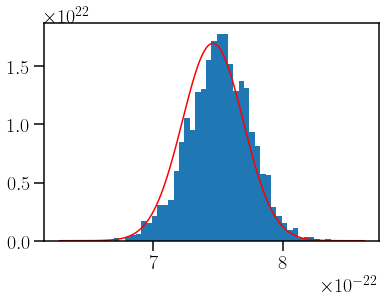

In [380]:

Nexp=2000
N=200
gsigma = stdev/np.sqrt(N)
gmean = mean
xplot = np.linspace(meanTH-5*gsigma, meanTH+5*gsigma, 1000)
yplot = gauss(xplot, gmean, gsigma)


plt.hist(listMean2, density=True, bins = 40)
plt.plot(xplot,yplot, color ="red")


This looks nice !

In [381]:
np.var(listMean2)/(gsigma**2)


1.0391346712083362

This is almost 1, that means that they are roughly the same

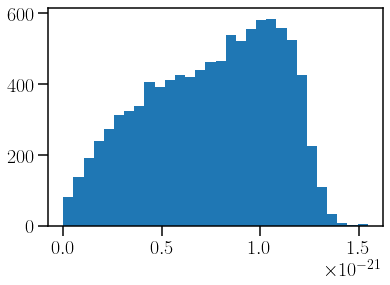

In [456]:
Nexp=1
N=10000
data = Egenerator(N,T)

content,edges, _  = plt.hist(data, bins = 30, density = False)
width = edges[1]-edges[0]
xExp = edges + width/2

#The observed value is content[i] and the coordinate xExp[i]
#The expected value is f(epsilon, T) at xExp[i]
#Compute the difference
listDif = []
for i in range(len(content)):
    dif = ((content[i]-f(xExp[i],T))**2)/content[i]
    listDif.append(dif)

We see that the bin content is much greater than 1 (even if the hist is not normalised), so the number of element in a bin is normally distributed

With a mean of $f(\epsilon, T)$ and a standard deviation $\sigma$

(array([3., 1., 1., 1., 0., 0., 1., 1., 2., 2., 0., 2., 1., 1., 2., 1., 1.,
        3., 5., 2.]),
 array([5.63650288e+35, 1.13151183e+38, 2.25738717e+38, 3.38326250e+38,
        4.50913783e+38, 5.63501316e+38, 6.76088849e+38, 7.88676383e+38,
        9.01263916e+38, 1.01385145e+39, 1.12643898e+39, 1.23902652e+39,
        1.35161405e+39, 1.46420158e+39, 1.57678911e+39, 1.68937665e+39,
        1.80196418e+39, 1.91455171e+39, 2.02713925e+39, 2.13972678e+39,
        2.25231431e+39]),
 <BarContainer object of 20 artists>)

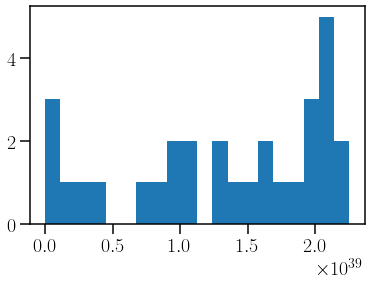

In [457]:
plt.hist(listDif, bins =20)


In [433]:
listDif

[5.671937068124706e+39,
 5.671937068124706e+39,
 2.0418973445248953e+39,
 2.0418973445248908e+39,
 1.8377076100724068e+40,
 3.834229458052296e+40,
 8.167589378099563e+39,
 8.167589378099584e+39,
 5.104743361312241e+40,
 5.104743361312227e+40,
 1.837707610072402e+40,
 1.8377076100724068e+40,
 5.808063557759705e+40,
 1.8377076100723967e+40,
 1.4520158894399264e+40,
 3.834229458052305e+40,
 1.8377076100724068e+40,
 5.104743361312241e+40,
 3.8342294580522845e+40,
 2.745217540972361e+40,
 2.745217540972361e+40,
 2.268774827249872e+40,
 2.745217540972361e+40,
 6.556759250752202e+40,
 1.2001818836151828e+41,
 1.4179842670311859e+41,
 5.808063557759675e+40,
 5.808063557759675e+40,
 4.446798661409798e+40,
 5.808063557759675e+40,
 5.808063557759735e+40,
 1.908039629717143e+41,
 1.0980870163889388e+41,
 9.075099308999587e+40,
 1.000529698817194e+41,
 5.808063557759735e+40,
 5.808063557759675e+40,
 1.0980870163889388e+41,
 1.0005296988172045e+41,
 1.4179842670311706e+41,
 1.2001818836151828e+41,
 